In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
data = pd.read_excel("bc2-1.xlsx")
dataset = pd.DataFrame(data)
dataset.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [9]:
dataset = dataset.replace('?',np.nan)
dataset = dataset.apply(lambda x:x.fillna(x.median()),axis=0)
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].astype('float64')

In [10]:
dataset.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

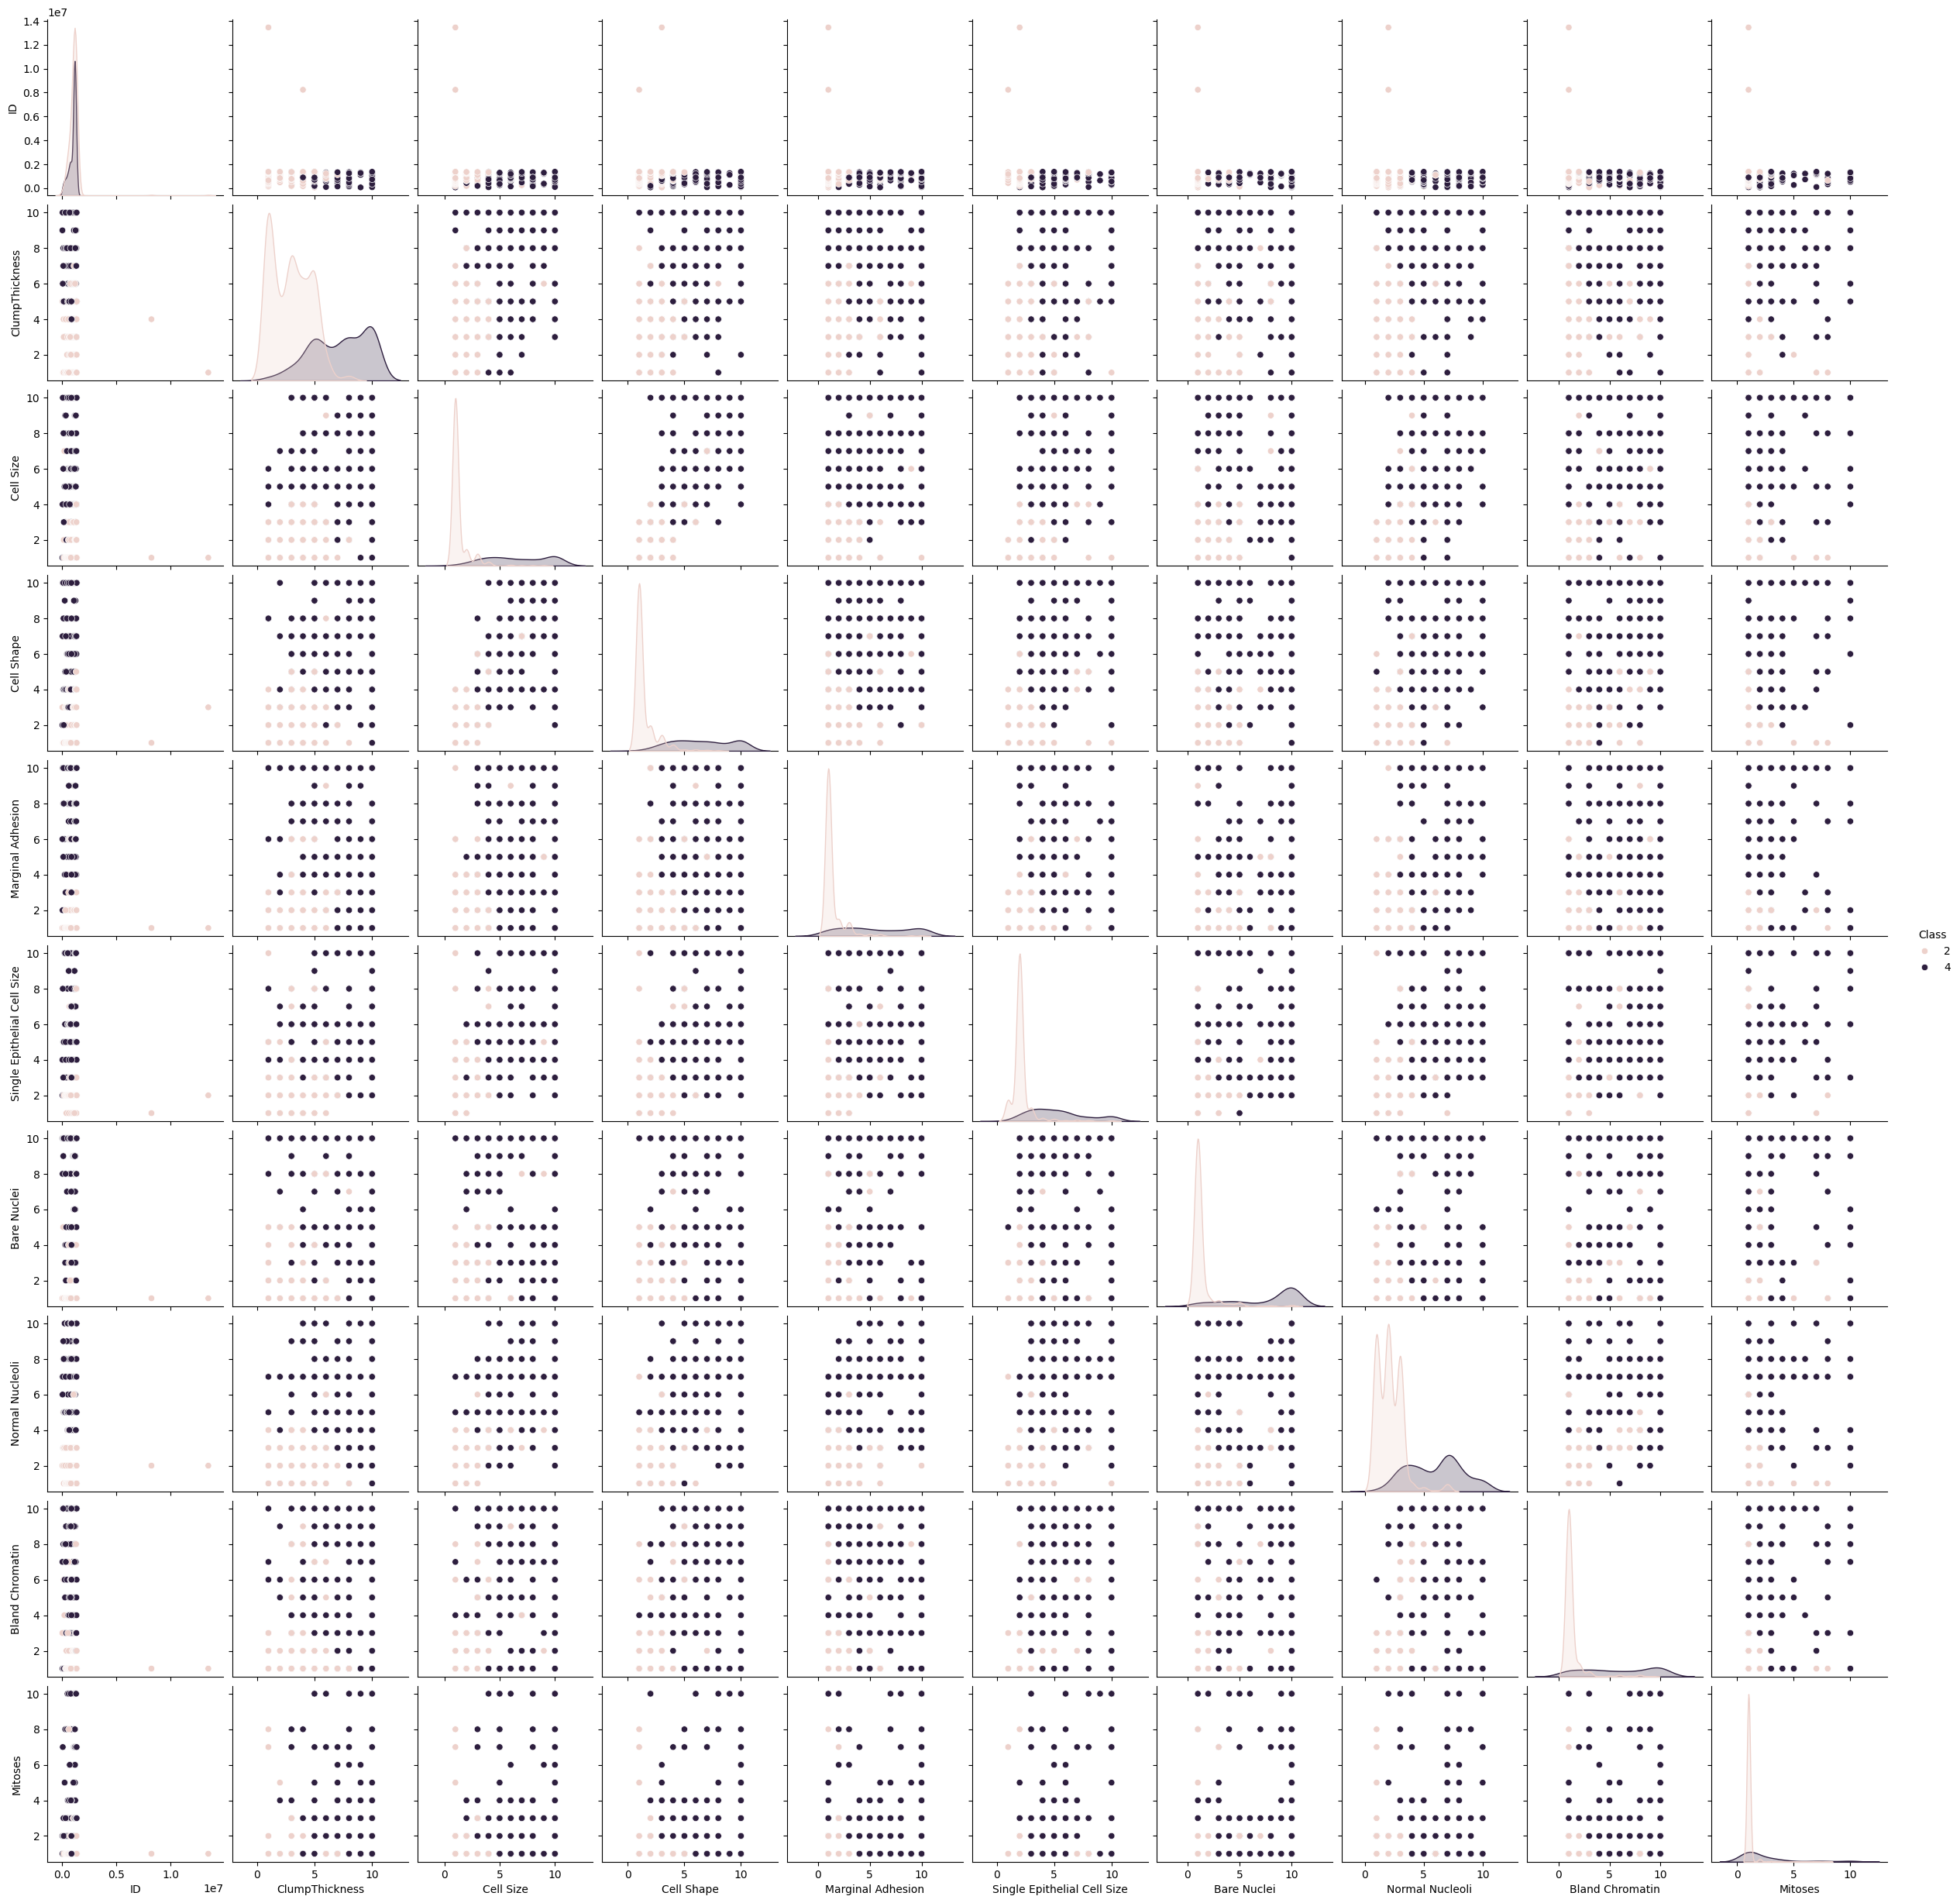

In [11]:
sns.pairplot(dataset, diag_kind = 'kde', hue="Class")

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
target = dataset['Class']
features = dataset.drop(["ID","Class"], axis=1)
X_train,X_test,y_train,y_test =train_test_split(features, target,test_size=0.2,random_state=10)

In [15]:
from sklearn.svm import SVC
svc_model = SVC(C=.1,kernel='linear',gamma = 1)
svc_model.fit(X_train,y_train)
prediction =svc_model.predict(X_test)

In [16]:
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.9749552772808586
0.9642857142857143


In [17]:
print(confusion_matrix(prediction,y_test))

[[95  2]
 [ 3 40]]


In [18]:
svc_model =SVC(kernel ='rbf')
svc_model.fit(X_train,y_train)

SVC()

In [19]:
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.9785330948121646
0.9642857142857143


In [20]:
svc_model =SVC(kernel ='poly')
svc_model.fit(X_train,y_train)
prediction =svc_model.predict(X_test)
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.9785330948121646
0.9571428571428572


In [21]:
svc_model =SVC(kernel ='sigmoid')
svc_model.fit(X_train,y_train)
prediction =svc_model.predict(X_test)
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.3953488372093023
0.44285714285714284
